#Fething tracks from API through Playlists and storing as csv

##Spotify credentials

In [ ]:
!pip install spotipy pandas scikit-learn wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 7.5 MB/s eta 0:00:00


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Set up Spotify API credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id="8e6089eabd114bdd8f101aed21f153ac",
    client_secret="821d642984744197bb156611cf378f96"
))

##Fetching tracks from playlists

In [ ]:
# Function to fetch tracks from a playlist
def fetch_tracks_from_playlist(playlist_id):
    try:
        results = sp.playlist_tracks(playlist_id)
        tracks = results['items']
        track_ids = [item['track']['id'] for item in tracks if item['track'] is not None]
        return track_ids
    except spotipy.exceptions.SpotifyException as e:
        print(f"Error fetching playlist {playlist_id}: {e}")
        return []

# Function to fetch tracks from multiple playlists
def fetch_tracks_from_multiple_playlists(playlist_ids):
    all_track_ids = []
    for playlist_id in playlist_ids:
        track_ids = fetch_tracks_from_playlist(playlist_id)
        all_track_ids.extend(track_ids)  # Add track IDs from each playlist
    return all_track_ids

playlist_ids = [

    '37i9dQZF1DX5q67ZpWyRrZ',  # Indie India

    '37i9dQZF1DX9Kz7jBbxgYQ',  # Desi Indie

    '37i9dQZF1DX1i3hvzHpcQV',  # Tamil Hot Hits
    '7upC0b5HWBFS4kErzbDMwc',  # Best of AR Rahman
    '37i9dQZF1DX5Ejj0EkURtP',  # All Out 2010s
    '37i9dQZF1DX4UtSsGT1Sbe',  # Are & Be

    '37i9dQZF1DWWjGdmeTyeJ6',  # Fresh Finds

    '37i9dQZF1DWWwrjLPC16W7',  # Latest Telugu
    '0Y9DWZ34PToWTM6wpChRGu',  # Best Telugu
    '37i9dQZF1DX0ieekvzt1Ic',  # Hot Hits India

    '4Mx67aqgClMsDfdtN0mmVC',  # Hindi Indie
    '37i9dQZF1DX0XUfTFmNBRM',  # Hot Hits Hindi
    '37i9dQZF1DWTBUKKNztYMo',  # 90s Telugu Romance

    '37i9dQZF1DXbYM3nMM0oPk',  # Mega Hit Mix
    '37i9dQZF1DXdPec7aLTmlC',  # Happy Hits!

        # Global Top Charts
    '37i9dQZF1DXcBWIGoYBM5M',  # Today's Top Hits
    '37i9dQZEVXbLZ52XmnySJg',  # Top 50 - Global
    '37i9dQZF1DX2L0iB23Enbq',  # Viral Hits
    '37i9dQZF1DWUxHPh2rEiHr',  # Global X
    '37i9dQZF1DWUa8ZRTfalHk',  # Pop Rising
    '37i9dQZF1DX1dCsSMSXSsP',  # Pop Shorts
    '37i9dQZF1DWWvvyNmW9V9a',  # Teen Beats
    '37i9dQZF1EQncLwOalG3K7',  # Pop Mix

    # Electronic/Dance
    '37i9dQZF1EQp9BVPsNVof1',  # Dance/Electronic Mix
    '37i9dQZF1DXaXB8fQg7xif',  # Dance Party
    '37i9dQZF1EIfUQ3GUkdGYn',  # EDM Trance Mix
    '37i9dQZF1EIdt7tQbR8QDN',  # Dance Pop Mix

    # Hip-Hop/R&B
    '37i9dQZF1DX0XUsuxWHRQd',  # RapCaviar
    '37i9dQZF1DX7FY5ma9162x',  # R&B Favourites
    '37i9dQZF1DWY6tYEFs22tT',  # Hip-Hop Central

    # Rock/Alternative
    '37i9dQZF1DWXRqgorJj26U',  # Rock Classics
    '37i9dQZF1DWVqJMsgEN0F4',  # Alt Now
    '37i9dQZF1DX2Ja6eBQeGaS',  # Rock in India

    # Mood/Vibe Based
    '37i9dQZF1DX3rxVfibe1L0',  # Mood Booster
    '37i9dQZF1DWZeKCadgRdKQ',  # Deep Focus
    '37i9dQZF1DX76Wlfdnj7AP',  # Beast Mode
    '37i9dQZF1DX32NsLKyzScr',  # Power Hour
    '37i9dQZF1DX4WYpdgoIcn6',  # Chill Hits

    # Regional Hits - US/UK
    '37i9dQZF1DXcBWIGoYBM5M',  # Today's Top Hits (US)
    '37i9dQZEVXbLRQDuF5jeBp',  # Top 50 - USA
    '37i9dQZF1DWSrVdvTl1tVY',  # UK House Music

    # Latin/Global
    '37i9dQZF1DX6ThddIjWuGT',  # Latin Pop Classics
    '37i9dQZF1DX1lVhptIYRda',  # Hot Country

    # Indian Regional
    '37i9dQZF1DX3A421vEQpsl',  # Bollywood 2.O
    '37i9dQZF1DXd8cOUiye1o2',  # New Music Hindi
    '37i9dQZF1DX8xfQRRX1PDm',  # Bollywood Dance Music
    '37i9dQZF1DX1lEmZQJ3oaw',  # Bollywood Jazz
    '37i9dQZF1DWSwxyU5zGZYe',  # Bollywood Acoustic
    '37i9dQZF1DX5VOFoIqmrOV',  # Tollywood Pearls
    '37i9dQZF1DWZdcdjsv83gQ',  # Telugu Party Time
    '37i9dQZF1DWXVJK4aT7pmk',  # Hot Hits Punjabi
    '37i9dQZF1DWWfZHTa5oacf',  # Bollywood Sundowner

    # Decade-Based
    '37i9dQZF1DX5Ejj0EkURtP',  # All Out 2010s
    '37i9dQZF1DX4o1oenSJRJd',  # All Out 2000s

    # Indie/Alternative
    '37i9dQZF1DX93iJeaL99GF',  # Legends of Indie India
    '37i9dQZF1DX8gDIpdqp1XJ',  # Modern Psychedelia

    # # Trending/Fresh
    '37i9dQZF1DWUa8ZRTfalHk',  # Pop Rising
    '37i9dQZF1DX5Vy6DFOcx00',  # Big on the Internet

]


# Fetch tracks from all playlists
all_track_ids = fetch_tracks_from_multiple_playlists(playlist_ids)
print(f"Fetched {len(all_track_ids)} tracks from the playlists.")


Fetched 4349 tracks from the playlists.


###Adding tracks explicitly, not from playlist

In [ ]:
# Combine playlist tracks with manually specified tracks
track_ids = all_track_ids + [
    '3n3Ppam7vgaVa1iaRUc9Lp',  # Mr. Brightside
    '0r7CVbZTwzfojBEd1CyWjN',  # Despacito
    '1oE80mo8uFzAY03gLw9i2p',  # Speak to Me
    '4aWmUDTfIPGksMNLV2rQP2',  # Knights of Cydonia
    '6rqhFgbbKwnb9MLmUQDhG6'   # Wannabe
]


##Fetching Audio Features (took 7mins to run)

In [ ]:
# Function to fetch audio features and track names in batches (due to API limit of 100 track IDs per request)
def fetch_audio_features_with_names(track_ids):
    audio_features = []
    track_names = []
    popularity = []
    batch_size = 100  # Spotify API limit
    for i in range(0, len(track_ids), batch_size):
        batch = track_ids[i:i + batch_size]
        batch_audio_features = sp.audio_features(batch)

        # If audio features are fetched, ensure we align both audio features and track names
        for idx, feature in enumerate(batch_audio_features):
            if feature:  # Check if the audio feature exists
                audio_features.append(feature)
                try:
                    track_info = sp.track(batch[idx])
                    track_names.append(track_info['name'])
                    popularity.append(track_info['popularity'])
                except spotipy.exceptions.SpotifyException as e:
                    print(f"Error fetching track info for ID {batch[idx]}: {e}")
                    track_names.append(None)  # Append None if there's an error
            else:
                print(f"Error fetching audio feature for track ID {batch[idx]}")

    return audio_features, track_names, popularity

# Fetch audio features and track names for the combined track IDs
audio_features, track_names, popularity= fetch_audio_features_with_names(track_ids)

# Convert audio features to DataFrame and add track names
import pandas as pd
df = pd.DataFrame(audio_features)
df['track_name'] = track_names
df['popularity'] = popularity


Error fetching audio feature for track ID 47tOl9FF9r6tNJypRo3Pe9
Error fetching audio feature for track ID 3VQIFCMfyKyfMQGhKegaPb
Error fetching audio feature for track ID 0r7CVbZTwzfojBEd1CyWjN
Error fetching audio feature for track ID 1oE80mo8uFzAY03gLw9i2p


##Mounting and storing csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.to_csv('/content/drive/MyDrive/2audio_features.csv', index=False)

#Run directly from here if csv is stored and available from previous sessions

#Mounting Google Drive --if havnt run above

In [ ]:
# Mounting drive -- to use csv files stored in drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Spotify set up --if havnt run above

In [ ]:
# installing libraires
!pip install spotipy pandas scikit-learn
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Set up Spotify API credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id="8e6089eabd114bdd8f101aed21f153ac",
    client_secret="821d642984744197bb156611cf378f96"
))

#Reading CSVs

In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/drive/MyDrive/2audio_features.csv')


song_library = pd.read_csv('/content/drive/MyDrive/tracks.csv')

# Sort tracks data based on popularity and take first 10,000 records
# df2 = song_library.sort_values(by=['popularity'], ascending=False).head(10000)
df2 = song_library.sort_values(by=['popularity'], ascending=False).head(10000).reset_index(drop=True)

In [ ]:
df1.tail()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_name,popularity
4345,0.562,0.4530,10,-8.113,0,0.0396,0.06840,0.223000,0.2350,0.1790,114.912,audio_features,3L95m6wi0vkhR9DB7GSSp9,spotify:track:3L95m6wi0vkhR9DB7GSSp9,https://api.spotify.com/v1/tracks/3L95m6wi0vkh...,https://api.spotify.com/v1/audio-analysis/3L95...,116870,4,Lobster,4
4346,0.470,0.6520,2,-9.629,1,0.0561,0.08310,0.000041,0.1750,0.1040,141.981,audio_features,3ZaEs1O8BG581qYPHpQ8d6,spotify:track:3ZaEs1O8BG581qYPHpQ8d6,https://api.spotify.com/v1/tracks/3ZaEs1O8BG58...,https://api.spotify.com/v1/audio-analysis/3ZaE...,190286,4,I Smoked Away My Brain (I'm God x Demons Mashu...,84
4347,0.355,0.9180,1,-4.360,1,0.0746,0.00119,0.000000,0.0971,0.2400,148.114,audio_features,3n3Ppam7vgaVa1iaRUc9Lp,spotify:track:3n3Ppam7vgaVa1iaRUc9Lp,https://api.spotify.com/v1/tracks/3n3Ppam7vgaV...,https://api.spotify.com/v1/audio-analysis/3n3P...,222200,4,Mr. Brightside,60
4348,0.660,0.7860,2,-4.757,1,0.1700,0.20900,0.000000,0.1120,0.8460,177.833,audio_features,4aWmUDTfIPGksMNLV2rQP2,spotify:track:4aWmUDTfIPGksMNLV2rQP2,https://api.spotify.com/v1/tracks/4aWmUDTfIPGk...,https://api.spotify.com/v1/audio-analysis/4aWm...,228200,4,Despacito (Featuring Daddy Yankee),1
4349,0.592,0.0196,1,-33.350,1,0.0358,0.36200,0.854000,0.1080,0.0312,119.504,audio_features,6rqhFgbbKwnb9MLmUQDhG6,spotify:track:6rqhFgbbKwnb9MLmUQDhG6,https://api.spotify.com/v1/tracks/6rqhFgbbKwnb...,https://api.spotify.com/v1/audio-analysis/6rqh...,65314,4,Speak To Me - 2011 Remastered Version,0


In [ ]:
df2.tail()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
9995,154Jycdld9dX9rBLE6L3v4,寄り酔い,67,216959,0,['和ぬか'],['6LesPuO1nhgJ2acJ4MjyBI'],2021-02-15,0.591,0.665,6,-6.525,0,0.1530,0.1400,0.001030,0.3820,0.694,118.195,4
9996,2iNZMMFEii4fU827NTyQ1J,Rap Da Akatsuki: Os Ninjas Mais Procurados Do ...,67,591299,0,['7 Minutoz'],['2563ILWHSx52eOxOoi5rJW'],2020-05-12,0.500,0.666,0,-7.784,1,0.1240,0.2260,0.000000,0.3610,0.332,115.996,4
9997,0jh5NRR4gX9tsFMLFDhEmX,Fingertips,67,165430,0,['Tom Gregory'],['6Rmg5JiRphFMlhkwGNl9Fu'],2020-01-10,0.718,0.693,1,-5.375,0,0.0252,0.0700,0.000000,0.1320,0.691,88.026,4
9998,6NffEVuGbmTvIpfSS93aMU,地球儀,67,232787,0,"['Aimer', 'Vaundy']","['0bAsR2unSRpn6BQPEnNlZm', '2IUl3m1H1EQ7QfNbNW...",2021-03-16,0.678,0.837,1,-5.367,1,0.0425,0.0129,0.000042,0.0711,0.916,100.058,4
9999,6pJI8iZBKPuMjWDstvO081,Benimle Kayboldun,67,189521,0,['Kaan Boşnak'],['03cvjFEHz8eGwYHq1L0Pp2'],2018-06-16,0.488,0.520,11,-11.051,0,0.0434,0.2240,0.389000,0.0709,0.696,180.035,4


#Merging dataframes(Dataset(df2), API(df1))

In [ ]:
df2.rename(columns={'name': 'track_name'}, inplace=True)

# Step 1: Find the common columns between df and df2
common_cols = df1.columns.intersection(df2.columns)
print(common_cols)

# Step 2: Concatenate df and df2 vertically, keeping only the common columns
df = pd.concat([df1[common_cols], df2[common_cols]], ignore_index=True)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'id', 'duration_ms', 'time_signature', 'track_name', 'popularity'],
      dtype='object')


In [ ]:
df.tail()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,track_name,popularity
14345,0.591,0.665,6,-6.525,0,0.1530,0.1400,0.001030,0.3820,0.694,118.195,154Jycdld9dX9rBLE6L3v4,216959,4,寄り酔い,67
14346,0.500,0.666,0,-7.784,1,0.1240,0.2260,0.000000,0.3610,0.332,115.996,2iNZMMFEii4fU827NTyQ1J,591299,4,Rap Da Akatsuki: Os Ninjas Mais Procurados Do ...,67
14347,0.718,0.693,1,-5.375,0,0.0252,0.0700,0.000000,0.1320,0.691,88.026,0jh5NRR4gX9tsFMLFDhEmX,165430,4,Fingertips,67
14348,0.678,0.837,1,-5.367,1,0.0425,0.0129,0.000042,0.0711,0.916,100.058,6NffEVuGbmTvIpfSS93aMU,232787,4,地球儀,67
14349,0.488,0.520,11,-11.051,0,0.0434,0.2240,0.389000,0.0709,0.696,180.035,6pJI8iZBKPuMjWDstvO081,189521,4,Benimle Kayboldun,67


#Removing Duplicates and dropping NaN valued rows

In [ ]:
df.drop_duplicates(subset=['id'], keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)
df.tail()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,track_name,popularity
12762,0.591,0.665,6,-6.525,0,0.1530,0.1400,0.001030,0.3820,0.694,118.195,154Jycdld9dX9rBLE6L3v4,216959,4,寄り酔い,67
12763,0.500,0.666,0,-7.784,1,0.1240,0.2260,0.000000,0.3610,0.332,115.996,2iNZMMFEii4fU827NTyQ1J,591299,4,Rap Da Akatsuki: Os Ninjas Mais Procurados Do ...,67
12764,0.718,0.693,1,-5.375,0,0.0252,0.0700,0.000000,0.1320,0.691,88.026,0jh5NRR4gX9tsFMLFDhEmX,165430,4,Fingertips,67
12765,0.678,0.837,1,-5.367,1,0.0425,0.0129,0.000042,0.0711,0.916,100.058,6NffEVuGbmTvIpfSS93aMU,232787,4,地球儀,67
12766,0.488,0.520,11,-11.051,0,0.0434,0.2240,0.389000,0.0709,0.696,180.035,6pJI8iZBKPuMjWDstvO081,189521,4,Benimle Kayboldun,67


In [ ]:
df.dropna()
df.reset_index(drop=True, inplace=True)
df.tail()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,track_name,popularity
12762,0.591,0.665,6,-6.525,0,0.1530,0.1400,0.001030,0.3820,0.694,118.195,154Jycdld9dX9rBLE6L3v4,216959,4,寄り酔い,67
12763,0.500,0.666,0,-7.784,1,0.1240,0.2260,0.000000,0.3610,0.332,115.996,2iNZMMFEii4fU827NTyQ1J,591299,4,Rap Da Akatsuki: Os Ninjas Mais Procurados Do ...,67
12764,0.718,0.693,1,-5.375,0,0.0252,0.0700,0.000000,0.1320,0.691,88.026,0jh5NRR4gX9tsFMLFDhEmX,165430,4,Fingertips,67
12765,0.678,0.837,1,-5.367,1,0.0425,0.0129,0.000042,0.0711,0.916,100.058,6NffEVuGbmTvIpfSS93aMU,232787,4,地球儀,67
12766,0.488,0.520,11,-11.051,0,0.0434,0.2240,0.389000,0.0709,0.696,180.035,6pJI8iZBKPuMjWDstvO081,189521,4,Benimle Kayboldun,67


#Some analysis

In [ ]:
# Display summary statistics for tracks data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
danceability,12767.0,0.643111,0.151369,0.00000,0.5460,0.657000,0.75300,0.980
energy,12767.0,0.640971,0.196334,0.00002,0.5180,0.663000,0.79100,1.000
key,12767.0,5.258244,3.573642,0.00000,2.0000,5.000000,8.00000,11.000
loudness,12767.0,-6.960021,3.449734,-40.44900,-8.2555,-6.282000,-4.80650,2.194
mode,12767.0,0.617295,0.486066,0.00000,0.0000,1.000000,1.00000,1.000
speechiness,12767.0,0.094228,0.094929,0.00000,0.0366,0.053800,0.10700,0.884
acousticness,12767.0,0.263031,0.269841,0.00000,0.0384,0.164000,0.42250,0.996
instrumentalness,12767.0,0.040404,0.158156,0.00000,0.0000,0.000002,0.00034,1.000
liveness,12767.0,0.174753,0.137124,0.00000,0.0939,0.120000,0.21200,0.989
valence,12767.0,0.515771,0.235774,0.00000,0.3330,0.513000,0.70400,0.989


##Most Popular tracks

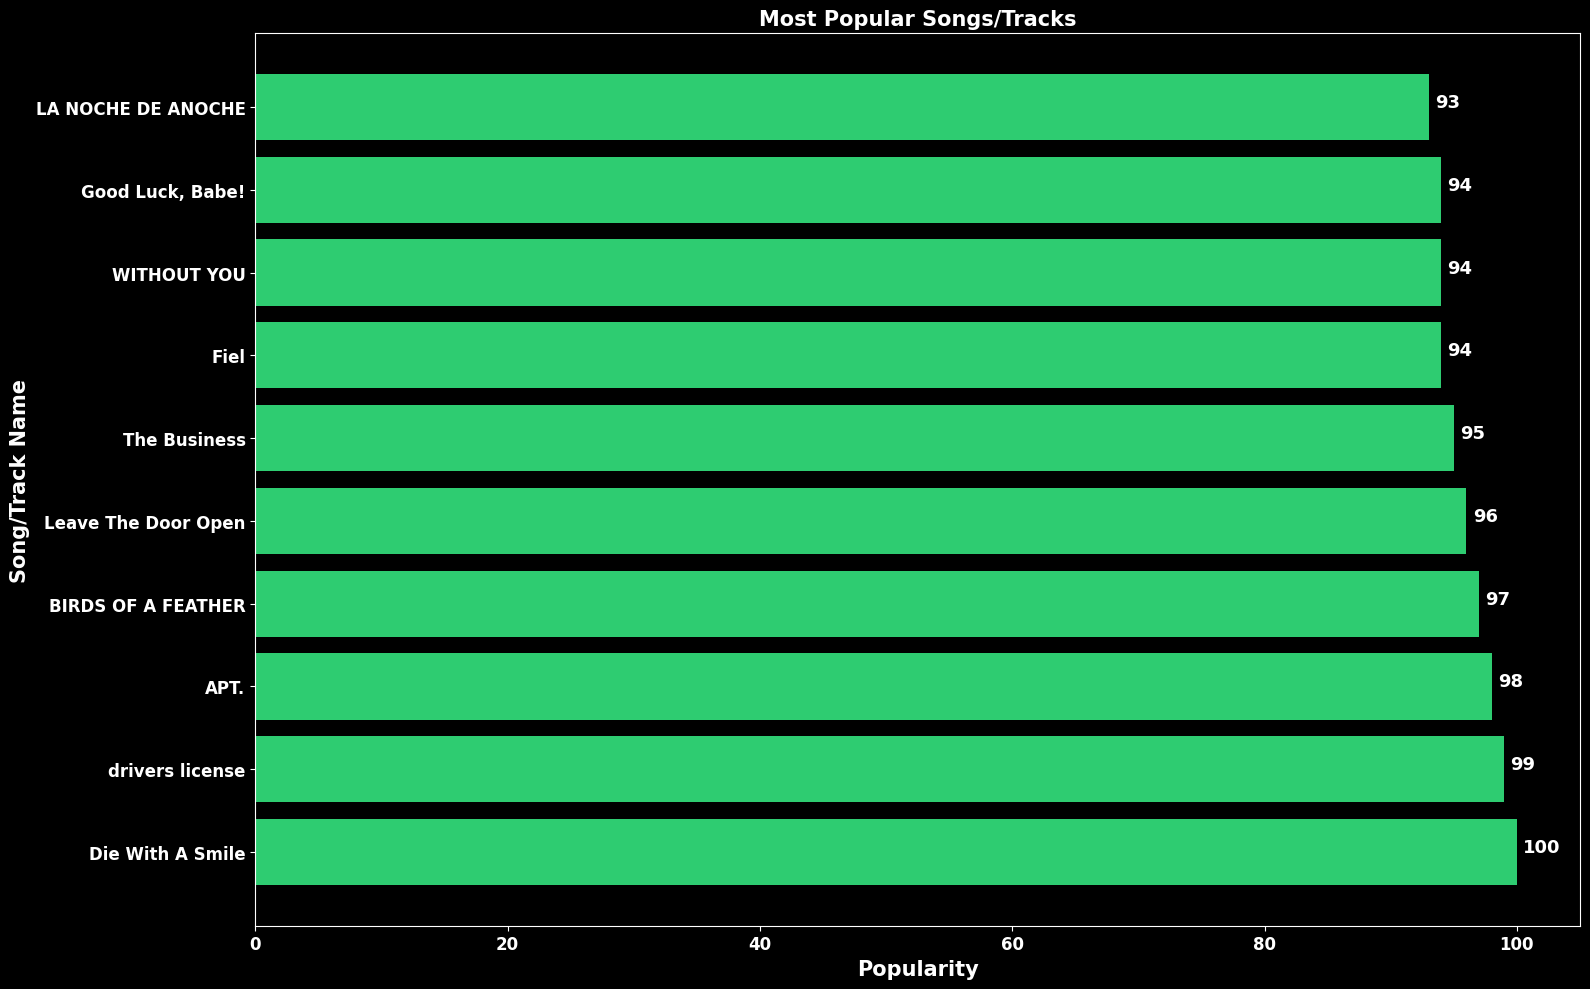

In [ ]:
# For visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Get top 10 most popular tracks
popular_songs = df.groupby('track_name')['popularity'].mean().sort_values(ascending=False).head(10)

plt.style.use('dark_background')  # Set dark theme
plt.figure(figsize=(16, 10))
plt.barh(popular_songs.index, popular_songs, color='#2ecc71')  # Green bars
plt.title('Most Popular Songs/Tracks', fontsize=15, fontweight='bold')
plt.xlabel('Popularity', fontsize=15, fontweight='bold')
plt.ylabel('Song/Track Name', fontsize=15, fontweight='bold')

# Add value labels
for i, v in enumerate(popular_songs):
    plt.text(v+0.5, i, str(int(v)), fontsize=13, fontweight='bold', color='white')

plt.xticks(fontsize='large', weight='bold', color='white')
plt.yticks(fontsize='large', weight='bold', color='white')
plt.tight_layout()
plt.show()

##Making wordcloud

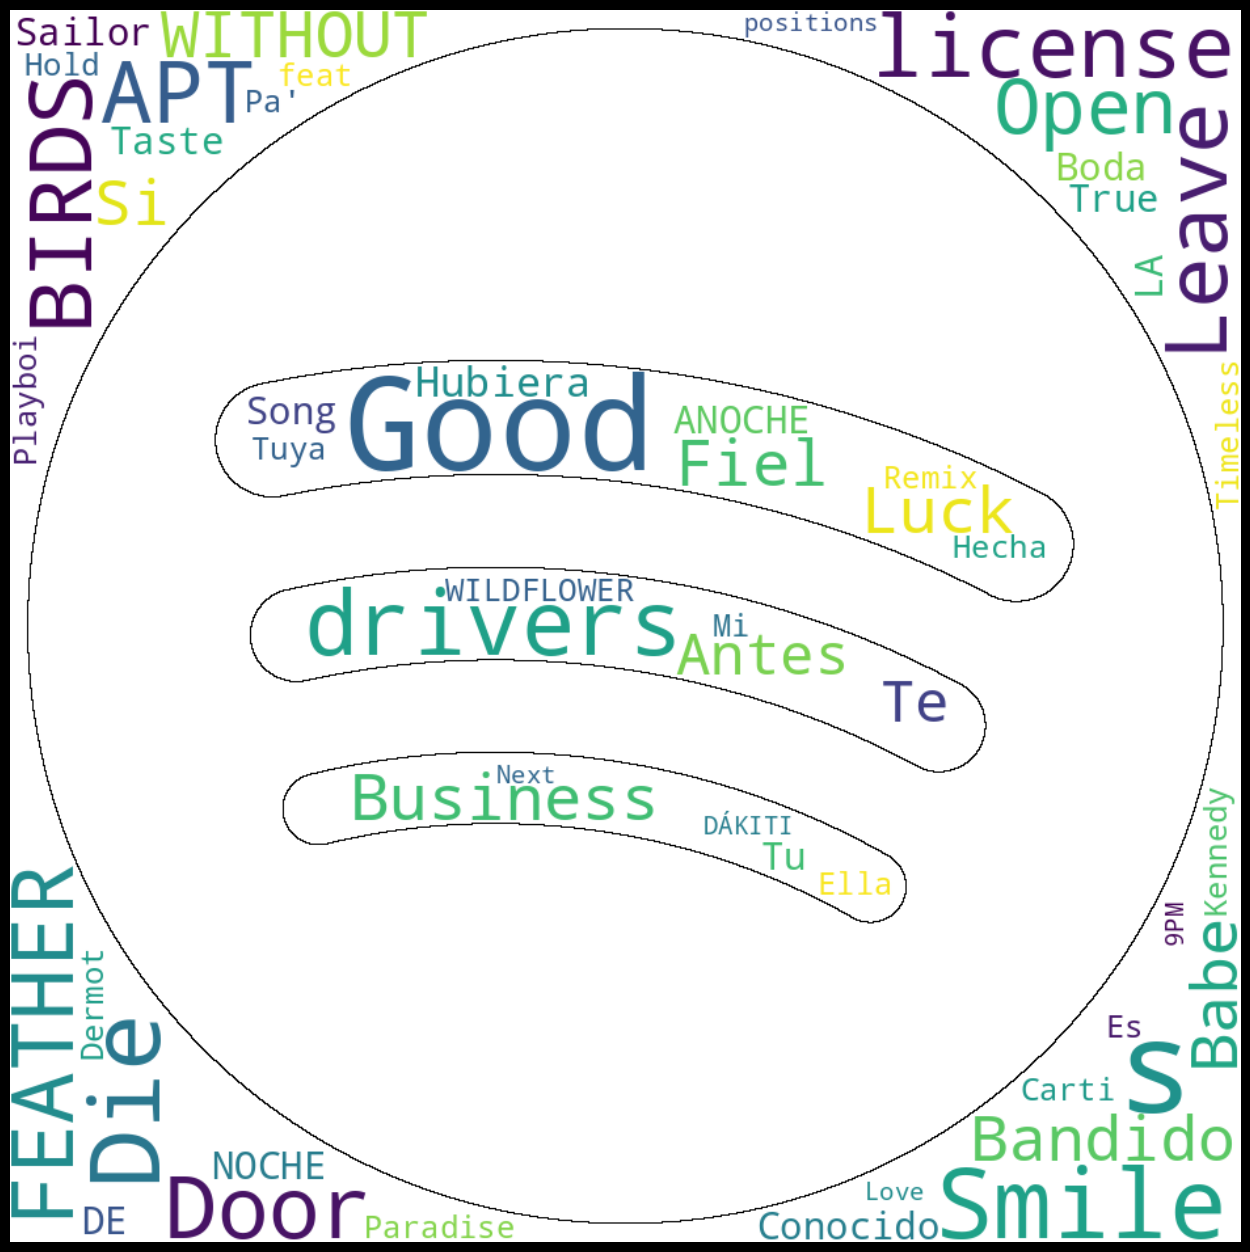

In [ ]:
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# 1. Generate text from popular tracks
# Assuming 'popularity' is a column in your dataset (replace if using a different metric)
popular_tracks = df.sort_values(by='popularity', ascending=False).head(30)  # Top 100 popular tracks
track_text = ' '.join(track for track in popular_tracks['track_name'].astype(str))

# 2. Load the mask image (e.g., a musical instrument shape or Spotify logo)
mask_image = np.array(Image.open("/content/drive/MyDrive/Spotify_Primary_Logo_RGB_White.png").convert("L"))  # Update path if needed

# 3. Prepare the mask image (adjust threshold if needed)
mask_image = np.where(mask_image > 200, 255, 0)

# 4. Generate word cloud using the custom mask
wc = WordCloud(background_color="white", mask=mask_image, contour_color='black', contour_width=1)
wordcloud = wc.generate(track_text)

# 5. Display the word cloud
plt.figure(figsize=(20, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#Scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler

# List of numerical features to normalize
numerical_features = ['danceability', 'energy', 'tempo', 'loudness', 'speechiness', 'acousticness',
                      'instrumentalness', 'liveness', 'valence']

# Initialize the scaler and normalize the selected numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Check the scaled features
print(df[numerical_features].tail())


       danceability    energy     tempo  loudness  speechiness  acousticness  \
12762     -0.344280  0.122394 -0.117910  0.126108     0.619140     -0.455957   
12763     -0.945483  0.127488 -0.193411 -0.238862     0.313636     -0.137239   
12764      0.494762  0.265014 -1.153732  0.459480    -0.727184     -0.715380   
12765      0.230497  0.998487 -0.740626  0.461799    -0.544935     -0.926994   
12766     -1.024763 -0.616173  2.005303 -1.185929    -0.535454     -0.144651   

       instrumentalness  liveness   valence  
12762         -0.248969  1.511436  0.755963  
12763         -0.255482  1.358284 -0.779467  
12764         -0.255482 -0.311798  0.743239  
12765         -0.255216 -0.755938  1.697581  
12766          2.204208 -0.757397  0.764446  


#Building models

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 1. KNN
def recommend_using_knn(track_id, n_neighbors=5):
    if track_id in df['id'].values:
        track_idx = df.index[df['id'] == track_id].tolist()[0]
        knn = NearestNeighbors(n_neighbors=n_neighbors+1, algorithm='auto')
        knn.fit(df[numerical_features])
        distances, indices = knn.kneighbors([df.loc[track_idx, numerical_features]])
        return df.iloc[indices[0][1:]], df.loc[track_idx]['track_name']  # Exclude the first item (input track)
    else:
        print(f"Track ID {track_id} not found in the dataset.")
        return pd.DataFrame(), ""

# 2. Cosine Similarity
def recommend_using_cosine_similarity(track_id, n_neighbors=5):
    if track_id in df['id'].values:
        track_idx = df.index[df['id'] == track_id].tolist()[0]
        similarity = cosine_similarity([df.loc[track_idx, numerical_features]], df[numerical_features])
        similar_indices = similarity.argsort()[0, -n_neighbors-1:-1][::-1]  # Exclude the track itself
        return df.iloc[similar_indices], df.loc[track_idx]['track_name']
    else:
        print(f"Track ID {track_id} not found in the dataset.")
        return pd.DataFrame(), ""

# 3. PCA with KNN
def recommend_using_pca_and_knn(track_id, n_neighbors=5, n_components=5):
    if track_id in df['id'].values:
        pca = PCA(n_components=n_components)
        reduced_features = pca.fit_transform(df[numerical_features])
        track_idx = df.index[df['id'] == track_id].tolist()[0]

        # Fit KNN on reduced features
        knn_pca = NearestNeighbors(n_neighbors=n_neighbors, algorithm='auto')
        knn_pca.fit(reduced_features)
        distances, indices = knn_pca.kneighbors([reduced_features[track_idx]])
        return df.iloc[indices[0]], df.loc[track_idx]['track_name']
    else:
        print(f"Track ID {track_id} not found in the dataset.")
        return pd.DataFrame(), ""

# # 4. Clustering with DBSCAN
# def recommend_using_dbscan(track_id, eps=1.5, min_samples=5):
#     dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#     cluster_labels = dbscan.fit_predict(df[numerical_features])
#     df['cluster'] = cluster_labels

#     if track_id in df['id'].values:
#         track_idx = df.index[df['id'] == track_id].tolist()[0]
#         cluster = df.loc[track_idx]['cluster']
#         if cluster == -1:  # Noise
#             print("Track belongs to a noise cluster; no recommendations.")
#             return pd.DataFrame(), ""
#         similar_tracks = df[df['cluster'] == cluster]
#         return similar_tracks.head(5), df.loc[track_idx]['track_name']
#     else:
#         print(f"Track ID {track_id} not found in the dataset.")
#         return pd.DataFrame(), ""

# 4. Improved DBSCAN recommendation
def recommend_using_dbscan(track_id, eps=1.5, min_samples=5, n_neighbors=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(df[numerical_features])
    df['cluster'] = cluster_labels

    if track_id in df['id'].values:
        track_idx = df.index[df['id'] == track_id].tolist()[0]
        cluster = df.loc[track_idx]['cluster']

        # Check if the track belongs to noise
        if cluster == -1:
            # print("Track belongs to a noise cluster; no recommendations.")
            # return pd.DataFrame(), ""
            return recommend_using_knn(track_id, n_neighbors)[0], df.loc[track_idx]['track_name']

        # Filter tracks from the same cluster
        similar_tracks = df[df['cluster'] == cluster].copy()

        # Compute cosine similarity within the cluster
        input_features = df.loc[track_idx, numerical_features].values.reshape(1, -1)
        cluster_features = similar_tracks[numerical_features].values
        similarity_scores = cosine_similarity(input_features, cluster_features)[0]

        # Rank tracks by similarity (excluding the input track itself)
        similar_tracks['similarity'] = similarity_scores
        similar_tracks = similar_tracks[similar_tracks['id'] != track_id]  # Exclude the input track
        similar_tracks = similar_tracks.sort_values(by='similarity', ascending=False).head(n_neighbors)

        return similar_tracks[['track_name', 'id']], df.loc[track_idx]['track_name']
    else:
        print(f"Track ID {track_id} not found in the dataset.")
        return pd.DataFrame(), ""

##Checking Recommendations given by models for example track

In [ ]:
track_id = "3bmsaFp11I9pbicxzlStf3"  # Example track ID
# KNN
knn_recommendations, track_name = recommend_using_knn(track_id)
print(f"Recommendations using KNN for '{track_name}':")
print(knn_recommendations[['track_name', 'id']])

# Cosine Similarity
cosine_recommendations, track_name = recommend_using_cosine_similarity(track_id)
print(f"\nRecommendations using Cosine Similarity for '{track_name}':")
print(cosine_recommendations[['track_name', 'id']])

# PCA + KNN
pca_recommendations, track_name = recommend_using_pca_and_knn(track_id)
print(f"\nRecommendations using PCA + KNN for '{track_name}':")
print(pca_recommendations[['track_name', 'id']])

# DBSCAN
dbscan_recommendations, track_name = recommend_using_dbscan(track_id)
print(f"\nRecommendations using DBSCAN for '{track_name}':")
print(dbscan_recommendations[['track_name', 'id']])

Recommendations using KNN for 'nadaaniyan':
                                             track_name  \
7278                            I Don't Care - Acoustic   
3655                                               Gone   
3905                                               Gone   
5553  Valerie - Live At BBC Radio 1 Live Lounge, Lon...   
3432                                           Memories   

                          id  
7278  1m84zLz4WizjR4mCDoXReg  
3655  2ayIgfvWo3SfYP2pVOr4pC  
3905  2dHoVW9AxJVSRebPRyV2aA  
5553  6nLvaCZFR1wEzW3sIKpsnr  
3432  2b8fOow8UzyDFAE27YhOZM  

Recommendations using Cosine Similarity for 'nadaaniyan':
                   track_name                      id
7278  I Don't Care - Acoustic  1m84zLz4WizjR4mCDoXReg
1515                 Memories  4cktbXiXOapiLBMprHFErI
3432                 Memories  2b8fOow8UzyDFAE27YhOZM
3905                     Gone  2dHoVW9AxJVSRebPRyV2aA
3655                     Gone  2ayIgfvWo3SfYP2pVOr4pC

Recommendations using PCA + KNN

#Song Recommender (Actuall app)

In [ ]:
# Function to add a track to the dataset and re-train all models
def add_track_to_dataset_and_retrain(track_id):
    audio_feature = sp.audio_features([track_id])[0]
    if audio_feature:
        new_track_df = pd.DataFrame([audio_feature])
        # Fetch the track name and add it to the new track DataFrame
        track_info = sp.track(track_id)
        new_track_df['track_name'] = track_info['name']
        # Normalize the numerical features for the new track
        new_track_df[numerical_features] = scaler.transform(new_track_df[numerical_features])
        # Append the new track to the main dataset
        global df
        df = pd.concat([df, new_track_df], ignore_index=True)

        # Re-train all models
        knn.fit(df[numerical_features])  # Re-train KNN
        global reduced_features, dbscan
        reduced_features = PCA(n_components=5).fit_transform(df[numerical_features])  # Re-train PCA
        dbscan = DBSCAN(eps=1.5, min_samples=5).fit(df[numerical_features])  # Re-train DBSCAN

        print(f"Added '{new_track_df['track_name'].values[0]}' to the dataset and retrained all models.")
    else:
        print(f"Could not retrieve audio features for track ID: {track_id}")


In [ ]:
# Function to search for a song and get its track ID
def get_track_id(song_name, artist_name):
    query = f"track:{song_name} artist:{artist_name}"
    results = sp.search(q=query, type='track', limit=1)
    if results['tracks']['items']:
        track_info = results['tracks']['items'][0]
        return track_info['id'], track_info['name']
    return None, None

In [ ]:
def user_interaction():
    # Get user input for song name and artist
    song_name = input("Enter the song name: ")
    artist_name = input("Enter the artist name: ")

    # Find the track ID
    track_id, track_name = get_track_id(song_name, artist_name)

    if track_id:
        if track_id not in df['id'].values:
            print(f"\nAdding '{track_name}' to the dataset and retraining the model...")
            add_track_to_dataset_and_retrain(track_id)

        print("\nGetting recommendations from all models...")
        print("-" * 80)

        print(f"\n🎵 Recommendations using KNN:")
        # KNN
        knn_recommendations, track_name = recommend_using_knn(track_id)
        print(f"Recommendations using KNN for '{track_name}':")
        print(knn_recommendations[['track_name', 'id']])
        print("=" * 50)

        print(f"\n🎵 Recommendations using Consine Similarity:")
        # Cosine Similarity
        cosine_recommendations, track_name = recommend_using_cosine_similarity(track_id)
        print(f"\nRecommendations using Cosine Similarity for '{track_name}':")
        print(cosine_recommendations[['track_name', 'id']])
        print("=" * 50)

        print(f"\n🎵 Recommendations using PCA + KNN:")
        # PCA + KNN
        pca_recommendations, track_name = recommend_using_pca_and_knn(track_id)
        print(f"\nRecommendations using PCA + KNN for '{track_name}':")
        print(pca_recommendations[['track_name', 'id']])
        print("=" * 50)

        print(f"\n🎵 Recommendations using DBSCAN:")
        # DBSCAN
        dbscan_recommendations, track_name = recommend_using_dbscan(track_id)
        print(f"\nRecommendations using DBSCAN for '{track_name}':")
        print(dbscan_recommendations[['track_name', 'id']])
        print("=" * 50)

        print("-" * 80)

    else:
        print("\n❌ Could not find the track based on your input.")

# Run the interaction once
user_interaction()

Enter the song name: Blinding Lights
Enter the artist name: The Weeknd

Getting recommendations from all models...
--------------------------------------------------------------------------------

🎵 Recommendations using KNN:
Recommendations using KNN for 'Blinding Lights':
                                   track_name                      id
2035                     Something In The Air  7rvhBrHKRK7G4SJFgclkr7
9704   Blinding Lights (with ROSALÍA) - Remix  7MXgrcOQAJ5VwSNUL0lDd3
9798                                    Up&Up  31L9yLXSj6LpCFupyMV6CR
12731                                90-talet  6O27WBEqkGeyq3hNYE0BdS
5822                             I'll Be Fine  0INehbMZOFPnaPBAjK97i3

🎵 Recommendations using Consine Similarity:

Recommendations using Cosine Similarity for 'Blinding Lights':
                                   track_name                      id
2035                     Something In The Air  7rvhBrHKRK7G4SJFgclkr7
9704   Blinding Lights (with ROSALÍA) - Remix  7MXgrcOQA

#Compare Models

In [ ]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from collections import defaultdict

# First, let's clean the dataset
def prepare_dataset(df, numerical_features):
    """
    Prepare dataset by handling missing values
    """
    # Create a copy to avoid modifying original data
    cleaned_df = df.copy()

    # For each numerical feature, fill NaN with median
    for feature in numerical_features:
        if cleaned_df[feature].isnull().any():
            median_value = cleaned_df[feature].median()
            cleaned_df[feature] = cleaned_df[feature].fillna(median_value)

    return cleaned_df

def calculate_recommendation_metrics(actual_features, recommended_features):
    """
    Calculate various metrics to evaluate recommendation quality
    """
    # Normalize features
    actual_features = (actual_features - actual_features.min()) / (actual_features.max() - actual_features.min() + 1e-8)
    recommended_features = (recommended_features - recommended_features.min()) / (recommended_features.max() - recommended_features.min() + 1e-8)

    # Calculate average euclidean distance (normalized)
    euclidean_dist = np.linalg.norm(actual_features.values - recommended_features.values, axis=1).mean()

    # Calculate feature-wise deviation
    feature_deviation = abs(actual_features.values - recommended_features.values).mean(axis=0)

    return {
        'euclidean_distance': euclidean_dist,
        'feature_deviations': dict(zip(actual_features.columns, feature_deviation))
    }

def evaluate_recommendation_model(model_func, test_data, numerical_features, n_samples=100):
    """
    Evaluate a recommendation model using multiple metrics
    """
    results = {
        'euclidean_distance': [],
        'feature_deviations': defaultdict(list)
    }

    # Randomly sample tracks for evaluation
    test_tracks = test_data['id'].sample(n=min(n_samples, len(test_data))).values

    for track_id in tqdm(test_tracks, desc=f"Evaluating {model_func.__name__}"):
        try:
            # Get recommendations
            recommendations, track_name = model_func(track_id)

            if len(recommendations) > 0:
                # Get original track features
                original_features = test_data[test_data['id'] == track_id][numerical_features]

                # Get recommended tracks features
                recommended_features = recommendations[numerical_features]

                # Calculate metrics
                metrics = calculate_recommendation_metrics(original_features, recommended_features)

                # Store results
                results['euclidean_distance'].append(metrics['euclidean_distance'])

                for feature, deviation in metrics['feature_deviations'].items():
                    results['feature_deviations'][feature].append(deviation)
        except Exception as e:
            print(f"Error processing track {track_id}: {str(e)}")
            continue

    # Calculate average metrics
    avg_results = {
        'avg_euclidean_distance': np.mean(results['euclidean_distance']) if results['euclidean_distance'] else 0,
        'avg_feature_deviations': {
            feature: np.mean(deviations) if deviations else 0
            for feature, deviations in results['feature_deviations'].items()
        }
    }

    return avg_results

def compare_models(df, numerical_features, n_samples=100):
    """
    Compare all recommendation models
    """
    # Clean the dataset first
    cleaned_df = prepare_dataset(df, numerical_features)

    # Split data into train and test sets
    train_df, test_df = train_test_split(cleaned_df, test_size=0.2, random_state=42)

    # Define models to evaluate
    models = [
        recommend_using_knn,
        recommend_using_cosine_similarity,
        recommend_using_pca_and_knn,
        recommend_using_dbscan
    ]

    # Evaluate each model
    results = {}
    for model in models:
        model_name = model.__name__.replace('recommend_using_', '').upper()
        results[model_name] = evaluate_recommendation_model(model, test_df, numerical_features)

    return results

def display_comparison_results(results):
    """
    Display comparison results in a formatted way
    """
    print("\nModel Comparison Results:")
    print("-" * 50)

    # Compare euclidean distance (lower is better)
    print("\nEuclidean Distance (lower is better):")
    for model, metrics in sorted(results.items(),
                               key=lambda x: x[1]['avg_euclidean_distance']):
        print(f"{model}: {metrics['avg_euclidean_distance']:.4f}")

    # Compare feature deviations
    print("\nAverage Feature Deviations (lower is better):")
    for model, metrics in results.items():
        print(f"\n{model}:")
        for feature, deviation in sorted(metrics['avg_feature_deviations'].items(),
                                      key=lambda x: x[1]):
            print(f"  {feature}: {deviation:.4f}")

# Check for NaN values in the dataset
print("Columns with NaN values:")
print(df[numerical_features].isna().sum()[df[numerical_features].isna().sum() > 0])

# Usage example
numerical_features = ['danceability', 'energy', 'key', 'loudness', 'mode',
                     'speechiness', 'acousticness', 'instrumentalness',
                     'liveness', 'valence', 'tempo', 'duration_ms',
                     'time_signature']

# Clean and evaluate
results = compare_models(df, numerical_features)
display_comparison_results(results)

Columns with NaN values:
Series([], dtype: int64)


Evaluating recommend_using_dbscan: 100%|██████████| 100/100 [00:27<00:00,  3.67it/s]


Model Comparison Results:
--------------------------------------------------

Euclidean Distance (lower is better):
COSINE_SIMILARITY: 2.0467
KNN: 2.1427
DBSCAN: 2.1447
PCA_AND_KNN: 2.1519

Average Feature Deviations (lower is better):

KNN:
  time_signature: 0.2120
  instrumentalness: 0.2303
  speechiness: 0.3625
  liveness: 0.3765
  acousticness: 0.4160
  tempo: 0.4773
  duration_ms: 0.4937
  key: 0.4998
  mode: 0.5060
  valence: 0.5129
  danceability: 0.5248
  energy: 0.5277
  loudness: 0.5477

COSINE_SIMILARITY:
  time_signature: 0.1013
  instrumentalness: 0.2269
  mode: 0.2280
  key: 0.4113
  speechiness: 0.4343
  liveness: 0.4517
  acousticness: 0.4614
  duration_ms: 0.4888
  tempo: 0.4915
  valence: 0.5004
  loudness: 0.5005
  energy: 0.5012
  danceability: 0.5105

PCA_AND_KNN:
  time_signature: 0.2200
  instrumentalness: 0.2373
  speechiness: 0.3567
  liveness: 0.3955
  acousticness: 0.3992
  duration_ms: 0.4884
  tempo: 0.4892
  mode: 0.4900
  key: 0.4979
  valence: 0.5045
  